In [1]:
from PIL import Image
import cv2
import albumentations as A
import os
from pathlib import Path
from glob import glob
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

warnings.filterwarnings('ignore')

sys.path.append('../src/')
from model import base_transform, base_dataset, base_utils

## GENERAL

In [2]:
ROOT_DATA = Path('../data/raw/')
IMG_DIR_TRAIN = ROOT_DATA / '1. Original Images' / 'a. Training Set'
MASK_DIR_TRAIN = ROOT_DATA / '2. All Segmentation Groundtruths' / 'a. Training Set' 
IMG_DIR_TEST = ROOT_DATA / '1. Original Images' / 'b. Testing Set'
MASK_DIR_TEST = ROOT_DATA / '2. All Segmentation Groundtruths' / 'b. Testing Set' 

In [3]:
num_img_train = len([_ for  _ in IMG_DIR_TRAIN.glob('*.jpg')])
print(f'Number of training img {num_img_train}')

Number of training img 54


In [4]:
num_img_test = len([_ for  _ in IMG_DIR_TEST.glob('*.jpg')])
print(f'Number of testing images {num_img_test}')

Number of testing images 27


In [5]:
for dpaths, dnames, _ in os.walk(MASK_DIR_TRAIN):
    for d in dnames:
        print('Dir name', str(d))
        print('Number mask', len(os.listdir(dpaths + '/' + d)))
        print('##############')

Dir name 3. Hard Exudates
Number mask 54
##############
Dir name 1. Microaneurysms
Number mask 54
##############
Dir name 2. Haemorrhages
Number mask 53
##############
Dir name 4. Soft Exudates
Number mask 26
##############
Dir name 5. Optic Disc
Number mask 54
##############


In [6]:
for dpaths, dnames, _ in os.walk(MASK_DIR_TEST):
    for d in dnames:
        print('Dir name', str(d))
        print('Number mask', len(os.listdir(dpaths + '/' + d)))
        print('##############')

Dir name 3. Hard Exudates
Number mask 27
##############
Dir name 1. Microaneurysms
Number mask 27
##############
Dir name 2. Haemorrhages
Number mask 27
##############
Dir name 4. Soft Exudates
Number mask 14
##############
Dir name 5. Optic Disc
Number mask 27
##############


## EX

In [7]:
ex_imgs, ex_masks = base_utils.get_datapath(img_path=IMG_DIR_TRAIN, mask_path=MASK_DIR_TRAIN)

[INFO] full img paths 54
[INFO] full_mask_paths 54


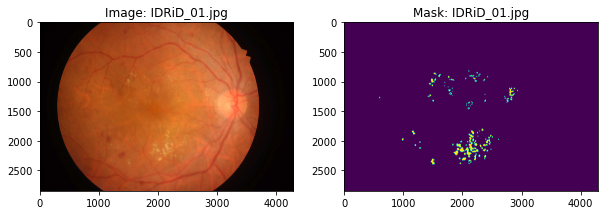

In [8]:
base_utils.show(index=0, images=ex_imgs, masks=ex_masks, transforms=None)

In [9]:
transforms = base_transform.Transform(image_size=1024, preprocessing_fn=None)

In [10]:
resize_trans = transforms.resize_transforms()
hard_trans = transforms.hard_transform()
pre_trans = transforms.pre_transform()

In [11]:
print(resize_trans[0])

OneOf([
  Compose([
    SmallestMaxSize(always_apply=False, p=1, max_size=2048, interpolation=1),
    RandomCrop(always_apply=False, p=1, height=1024, width=1024),
  ], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}),
  Compose([
    Resize(always_apply=False, p=1, height=1024, width=1024, interpolation=1),
  ], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}),
  Compose([
    LongestMaxSize(always_apply=False, p=1, max_size=2048, interpolation=1),
    RandomCrop(always_apply=False, p=1, height=1024, width=1024),
  ], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}),
], p=1)


In [12]:
print(hard_trans)

[RandomRotate90(always_apply=False, p=0.5), Cutout(always_apply=False, p=0.5, num_holes=8, max_h_size=8, max_w_size=8), RandomBrightnessContrast(always_apply=False, p=0.3, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True), GridDistortion(always_apply=False, p=0.3, num_steps=5, distort_limit=(-0.3, 0.3), interpolation=1, border_mode=4, value=None, mask_value=None), HueSaturationValue(always_apply=False, p=0.3, hue_shift_limit=(-20, 20), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20))]


In [13]:
print(pre_trans)

[Resize(always_apply=True, p=1, height=1024, width=1024, interpolation=1)]


Name:  RandomRotate90
Name:  Cutout
Name:  RandomBrightnessContrast
Name:  GridDistortion
Name:  HueSaturationValue


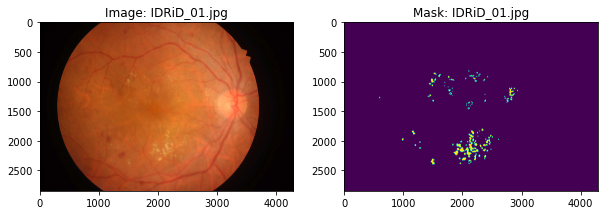

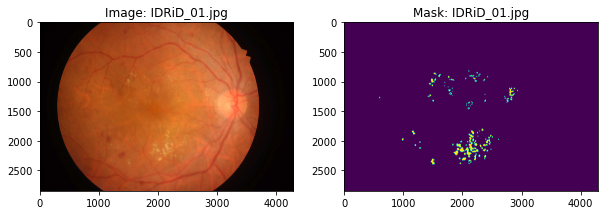

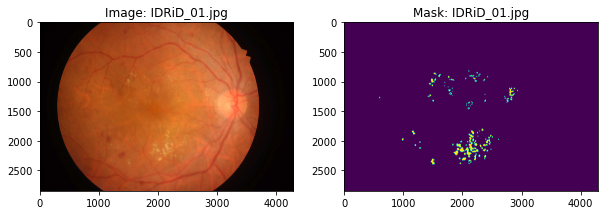

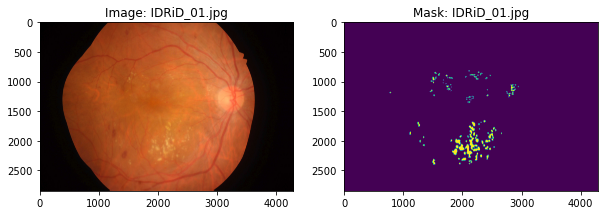

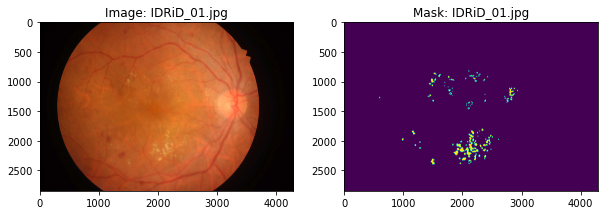

In [14]:
for i in range(len(hard_trans)):
    print('Name: ', hard_trans[i].__class__.__name__)
    base_utils.show(index=0, images=ex_imgs, masks=ex_masks, transforms=A.Compose([hard_trans[i]]))      

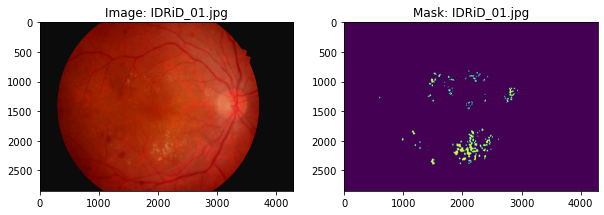

In [15]:
base_utils.show(index=0, images=ex_imgs, masks=ex_masks, transforms=A.Compose(hard_trans))

In [16]:
mask_0 = Image.open(ex_masks[0])
mask_np = np.array(mask_0).astype(np.uint8)
print('Pixel values', np.unique(mask_np))

foreground = np.where(mask_np > 0)

print(f'fore/back percentage is {len(foreground[0])/(mask_np.shape[0]*mask_np.shape[1])*100} %')

Pixel values [0 1]
fore/back percentage is 0.9276443013164515 %


In [17]:
percentage = []
for mask_path in ex_masks:
    mask = Image.open(mask_path)
    mask_np= np.array(mask).astype(np.uint8)
    foreground = np.where(mask_np > 0)
    percent = len(foreground[0])/(mask_np.shape[0]*mask_np.shape[1])*100
    percentage.append(percent)

percentage = np.array(percentage).astype(np.float32)
print(f'mean fore/mask percentage is {np.mean(percentage)} %')


mean fore/mask percentage is 0.8066483736038208 %


## HE

In [18]:
ex_imgs, ex_masks = base_utils.get_datapath(img_path=IMG_DIR_TRAIN, mask_path=MASK_DIR_TRAIN, lesion_type='HE')

[INFO] full img paths 53
[INFO] full_mask_paths 53


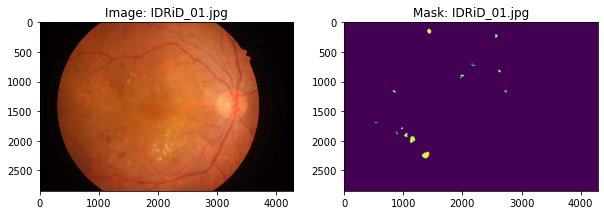

In [19]:
base_utils.show(index=0, images=ex_imgs, masks=ex_masks, transforms=None)

In [20]:
transforms = base_transform.Transform(image_size=1024, preprocessing_fn=None)

In [21]:
resize_trans = transforms.resize_transforms()
hard_trans = transforms.hard_transform()
pre_trans = transforms.pre_transform()

Name:  RandomRotate90
Name:  Cutout
Name:  RandomBrightnessContrast
Name:  GridDistortion
Name:  HueSaturationValue


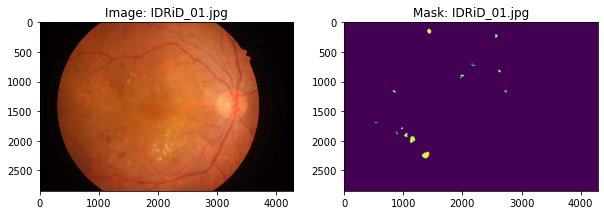

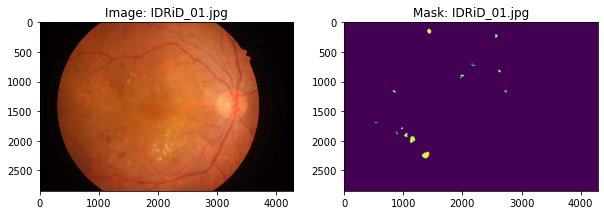

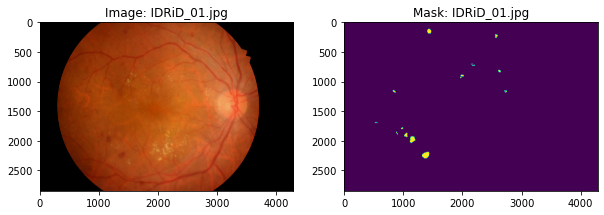

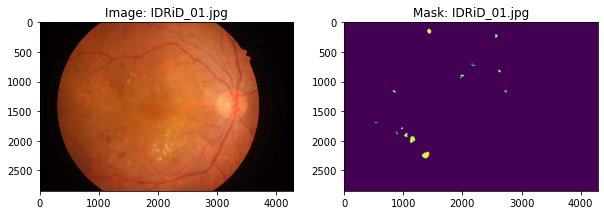

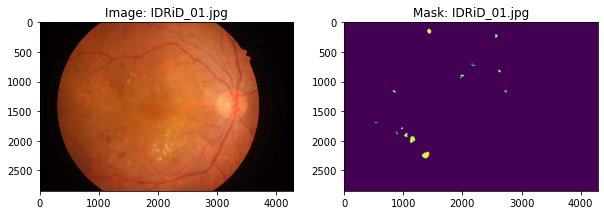

In [22]:
for i in range(len(hard_trans)):
    print('Name: ', hard_trans[i].__class__.__name__)
    base_utils.show(index=0, images=ex_imgs, masks=ex_masks, transforms=A.Compose([hard_trans[i]]))      

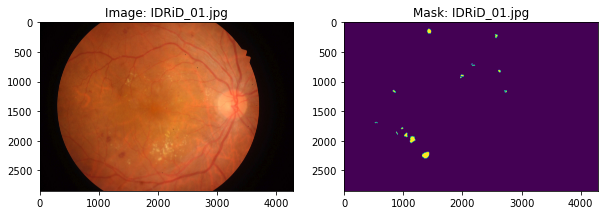

In [23]:
base_utils.show(index=0, images=ex_imgs, masks=ex_masks, transforms=A.Compose(hard_trans))

In [24]:
percentage = []
for mask_path in ex_masks:
    mask = Image.open(mask_path)
    mask_np= np.array(mask).astype(np.uint8)
    foreground = np.where(mask_np > 0)
    percent = len(foreground[0])/(mask_np.shape[0]*mask_np.shape[1])*100
    percentage.append(percent)

percentage = np.array(percentage).astype(np.float32)
print(f'mean fore/mask percentage is {np.mean(percentage)} %')


mean fore/mask percentage is 1.0043270587921143 %


## MA

In [25]:
ex_imgs, ex_masks = base_utils.get_datapath(img_path=IMG_DIR_TRAIN, mask_path=MASK_DIR_TRAIN, lesion_type='MA')

[INFO] full img paths 54
[INFO] full_mask_paths 54


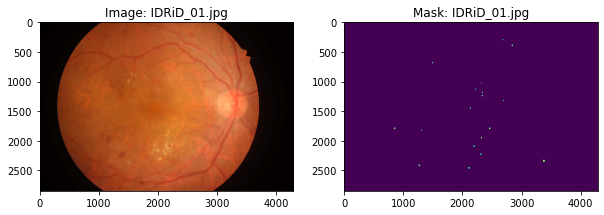

In [26]:
base_utils.show(index=0, images=ex_imgs, masks=ex_masks, transforms=None)

In [27]:
transforms = base_transform.Transform(image_size=1024, preprocessing_fn=None)

In [28]:
resize_trans = transforms.resize_transforms()
hard_trans = transforms.hard_transform()
pre_trans = transforms.pre_transform()

Name:  RandomRotate90
Name:  Cutout
Name:  RandomBrightnessContrast
Name:  GridDistortion
Name:  HueSaturationValue


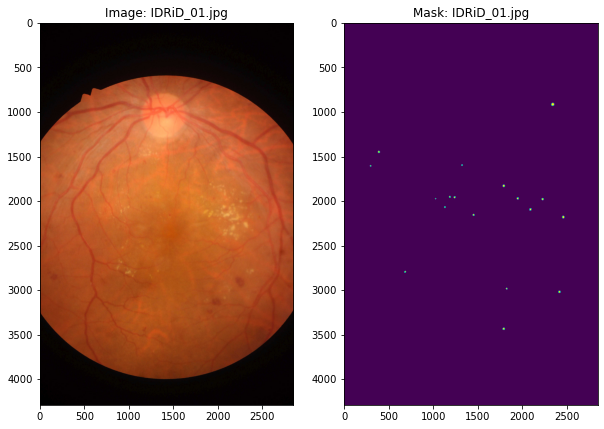

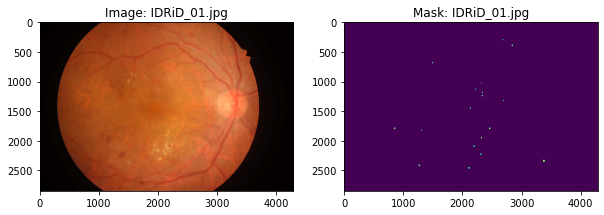

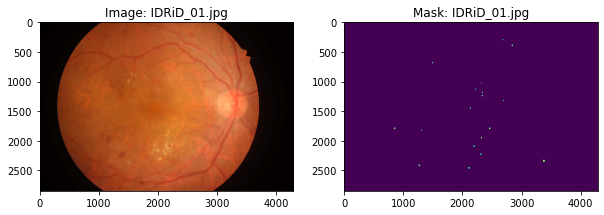

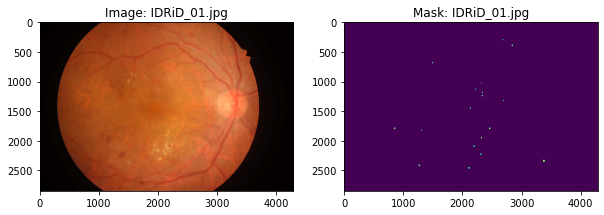

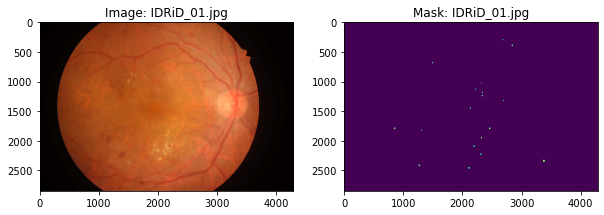

In [29]:
for i in range(len(hard_trans)):
    print('Name: ', hard_trans[i].__class__.__name__)
    base_utils.show(index=0, images=ex_imgs, masks=ex_masks, transforms=A.Compose([hard_trans[i]]))      

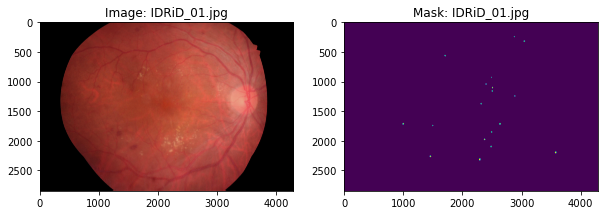

In [30]:
base_utils.show(index=0, images=ex_imgs, masks=ex_masks, transforms=A.Compose(hard_trans))

In [31]:
percentage = []
for mask_path in ex_masks:
    mask = Image.open(mask_path)
    mask_np= np.array(mask).astype(np.uint8)
    foreground = np.where(mask_np > 0)
    percent = len(foreground[0])/(mask_np.shape[0]*mask_np.shape[1])*100
    percentage.append(percent)

percentage = np.array(percentage).astype(np.float32)
print(f'mean fore/mask percentage is {np.mean(percentage)} %')


mean fore/mask percentage is 0.10690002143383026 %


## SE

In [32]:
ex_imgs, ex_masks = base_utils.get_datapath(img_path=IMG_DIR_TRAIN, mask_path=MASK_DIR_TRAIN, lesion_type='SE')

[INFO] full img paths 26
[INFO] full_mask_paths 26


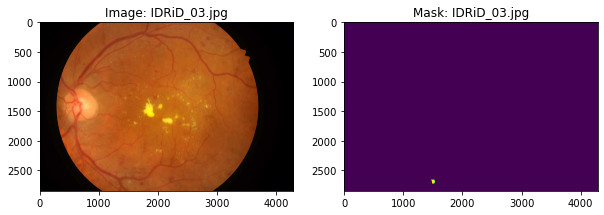

In [33]:
base_utils.show(index=0, images=ex_imgs, masks=ex_masks, transforms=None)

In [34]:
transforms = base_transform.Transform(image_size=1024, preprocessing_fn=None)

In [35]:
resize_trans = transforms.resize_transforms()
hard_trans = transforms.hard_transform()
pre_trans = transforms.pre_transform()

Name:  RandomRotate90
Name:  Cutout
Name:  RandomBrightnessContrast
Name:  GridDistortion
Name:  HueSaturationValue


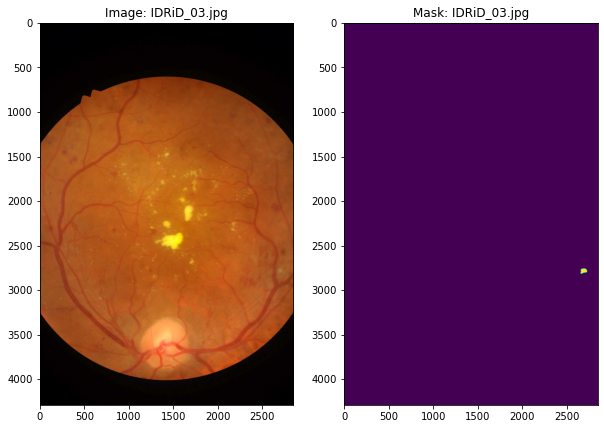

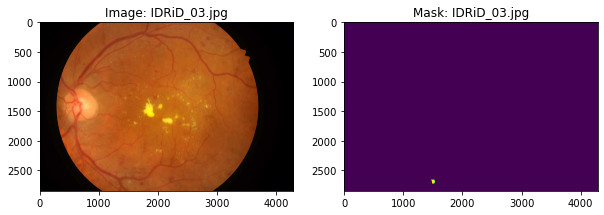

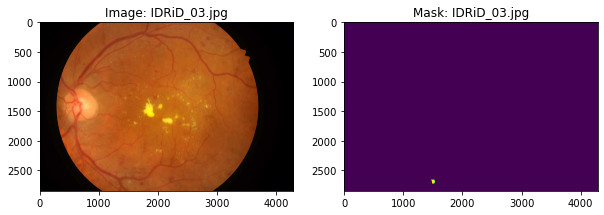

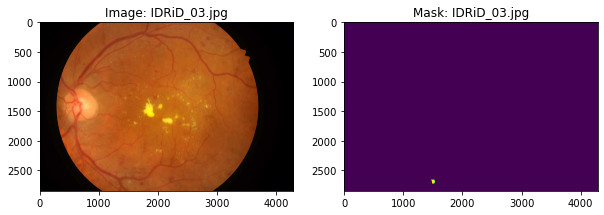

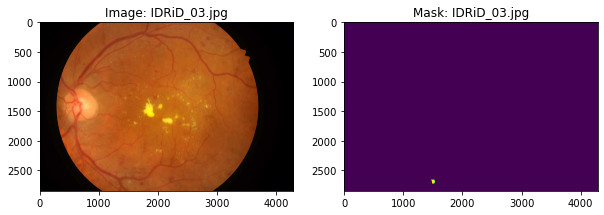

In [66]:
for i in range(len(hard_trans)):
    print('Name: ', hard_trans[i].__class__.__name__)
    base_utils.show(index=0, images=ex_imgs, masks=ex_masks, transforms=A.Compose([hard_trans[i]]))      

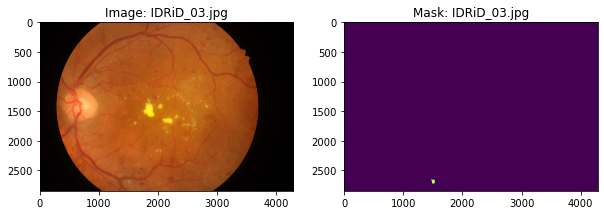

In [67]:
base_utils.show(index=0, images=ex_imgs, masks=ex_masks, transforms=A.Compose(hard_trans))

In [68]:
percentage = []
for mask_path in ex_masks:
    mask = Image.open(mask_path)
    mask_np= np.array(mask).astype(np.uint8)
    foreground = np.where(mask_np > 0)
    percent = len(foreground[0])/(mask_np.shape[0]*mask_np.shape[1])*100
    percentage.append(percent)

percentage = np.array(percentage).astype(np.float32)
print(f'mean fore/mask percentage is {np.mean(percentage)} %')


mean fore/mask percentage is 0.3933766484260559 %
